# Project 1

    We begin by loading the data

In [1]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
DATA_FOLDER = 'data/'

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)
AAA = 0;

note that here we are only considering a sub_sample as the "True" value indicates

In [4]:
y_train

array([ 1., -1., -1., ...,  1., -1., -1.])

In [5]:
ids_train
np.mean(tx_train,axis=0)

array([ -4.90230794e+01,   4.92398193e+01,   8.11819816e+01,
         5.78959617e+01,  -7.08420675e+02,  -6.01237051e+02,
        -7.09356603e+02,   2.37309984e+00,   1.89173324e+01,
         1.58432217e+02,   1.43760943e+00,  -1.28304708e-01,
        -7.08985189e+02,   3.87074191e+01,  -1.09730480e-02,
        -8.17107200e-03,   4.66602072e+01,  -1.95074680e-02,
         4.35429640e-02,   4.17172345e+01,  -1.01191920e-02,
         2.09797178e+02,   9.79176000e-01,  -3.48329567e+02,
        -3.99254314e+02,  -3.99259788e+02,  -6.92381204e+02,
        -7.09121609e+02,  -7.09118631e+02,   7.30645914e+01])

In [6]:
# illegal: 
pd.DataFrame(tx_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Helper functions

In [7]:
def replace_999_median(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

def replace_999_mean(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

def add_ones(tx):
    return np.concatenate((np.ones([tx.shape[0],1]),tx), axis=1)

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

In [8]:


tx_train, nan_values_train = replace_999_median(tx_train)
tx_test, nan_values_test = replace_999_median(tx_test)



In [9]:
tx_train = standardize(tx_train)
tx_train = tx_train[0]
tx_test = standardize(tx_test)
tx_test = tx_test[0]

In [10]:
if (AAA!=1):
    tx_train = add_ones(tx_train)
    tx_test = add_ones(tx_test)
    AAA = 1


In [11]:
np.mean(tx_train,axis=0)

array([  1.00000000e+00,   9.27252671e-13,   4.50019089e-15,
        -3.48448848e-15,   7.19675786e-15,  -3.68138116e-12,
         2.13543213e-12,   5.95433581e-13,   2.16429719e-14,
         6.39742126e-15,   2.86409207e-15,  -7.00447966e-15,
         4.45924897e-15,   4.29197803e-12,  -5.96492045e-15,
         1.35646161e-16,   7.13136217e-17,   2.58030370e-14,
        -1.06327391e-16,  -1.87188487e-16,   8.24369382e-15,
         1.41040513e-16,  -9.00283004e-15,  -6.01698247e-16,
        -2.95741174e-12,   1.46076658e-15,   2.17857554e-14,
        -4.93485594e-12,   5.44553736e-15,  -2.56949984e-15,
        -8.76751116e-16])

In [12]:
tx_train.shape

(250000, 31)

In [13]:
initial_w = np.zeros(tx_train.shape[1])
initial_w.shape

(31,)

In [14]:
gamma = 0.05
max_iters = 1000
lambda_ = 0.5

# Methods

### Functions for methods: 

In [37]:
OUT_FOLDER = 'output/'

def func_least_squares (y, tx, test_set, fct='mse'):
    name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mse');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

########################  RIDGE REGRESSION #######################################################
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

## LEAST-SQUARES

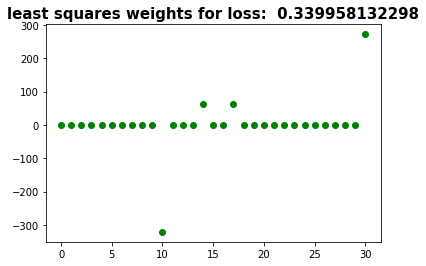

In [16]:
w, loss = func_least_squares (y=y_train, tx=tx_train, test_set=tx_test, fct='mse');


In [17]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

74.499200000000002

## Gradient descent 

Gradient Descent(0/499): loss=0.5000000000000249, w0=-0.031466400000014945, w1=0.002504206625732244
Gradient Descent(1/499): loss=0.4494343967425655, w0=-0.0597861600000126, w1=0.004438498929019952
Gradient Descent(2/499): loss=0.4237550966541934, w0=-0.08527394400001406, w1=0.006020285830294936
Gradient Descent(3/499): loss=0.4070187761061894, w0=-0.108212949600019, w1=0.0072840399711404345
Gradient Descent(4/499): loss=0.3951946905073953, w0=-0.12885805464002748, w1=0.008234547940797575
Gradient Descent(5/499): loss=0.38648993849775537, w0=-0.14743864917603822, w1=0.008883836358338948
Gradient Descent(6/499): loss=0.3798896347830327, w0=-0.16416118425845092, w1=0.009255089133456313
Gradient Descent(7/499): loss=0.37476690775624144, w0=-0.17921146583262498, w1=0.009378902879218826
Gradient Descent(8/499): loss=0.37071472549275486, w0=-0.19275671924938384, w1=0.00928903699482596
Gradient Descent(9/499): loss=0.3674580691602446, w0=-0.20494744732446882, w1=0.009019283091522143
Gradient 

Gradient Descent(87/499): loss=0.34212870956692654, w0=-0.3146344070758452, w1=-0.013937673544359494
Gradient Descent(88/499): loss=0.3420802768523936, w0=-0.31463736636832257, w1=-0.013832832892408138
Gradient Descent(89/499): loss=0.3420330390166304, w0=-0.3146400297315524, w1=-0.01372464402478169
Gradient Descent(90/499): loss=0.3419869627414883, w0=-0.3146424267584595, w1=-0.013613258714729596
Gradient Descent(91/499): loss=0.3419420157799274, w0=-0.3146445840826761, w1=-0.013498824030005345
Gradient Descent(92/499): loss=0.3418981669158857, w0=-0.3146465256744712, w1=-0.013381482469887074
Gradient Descent(93/499): loss=0.3418553859259397, w0=-0.31464827310708704, w1=-0.013261372098071449
Gradient Descent(94/499): loss=0.3418136435426556, w0=-0.3146498457964415, w1=-0.013138626671572779
Gradient Descent(95/499): loss=0.34177291141953503, w0=-0.31465126121686077, w1=-0.013013375765755411
Gradient Descent(96/499): loss=0.34173316209747634, w0=-0.3146525350952383, w1=-0.01288574489562

Gradient Descent(169/499): loss=0.3403495342979599, w0=-0.31466399476383633, w1=-0.002107072051088
Gradient Descent(170/499): loss=0.3403419724774923, w0=-0.31466399528752653, w1=-0.001975784246089955
Gradient Descent(171/499): loss=0.3403345680806975, w0=-0.3146639957588478, w1=-0.0018453765342193655
Gradient Descent(172/499): loss=0.340327317644765, w0=-0.31466399618303703, w1=-0.0017158531399853452
Gradient Descent(173/499): loss=0.3403202177887653, w0=-0.3146639965648074, w1=-0.0015872178929527423
Gradient Descent(174/499): loss=0.3403132652115199, w0=-0.31466399690840086, w1=-0.0014594742408023378
Gradient Descent(175/499): loss=0.3403064566895287, w0=-0.31466399721763505, w1=-0.0013326252620270804
Gradient Descent(176/499): loss=0.34029978907496017, w0=-0.31466399749594587, w1=-0.0012066736782740842
Gradient Descent(177/499): loss=0.3402932592936979, w0=-0.31466399774642567, w1=-0.0010816218663419258
Gradient Descent(178/499): loss=0.3402868643434471, w0=-0.3146639979718576, w1=-

Gradient Descent(252/499): loss=0.34004522384158087, w0=-0.3146639999999433, w1=0.005858594767136622
Gradient Descent(253/499): loss=0.3400438092250343, w0=-0.31466400000002703, w1=0.0059224978059226035
Gradient Descent(254/499): loss=0.34004242185190625, w0=-0.3146640000001024, w1=0.005985775687963906
Gradient Descent(255/499): loss=0.34004106117404187, w0=-0.31466400000017025, w1=0.006048433622663741
Gradient Descent(256/499): loss=0.34003972665468096, w0=-0.3146640000002313, w1=0.006110476804469093
Gradient Descent(257/499): loss=0.34003841776821264, w0=-0.3146640000002863, w1=0.006171910411958805
Gradient Descent(258/499): loss=0.3400371339999343, w0=-0.31466400000033584, w1=0.006232739606968469
Gradient Descent(259/499): loss=0.34003587484581566, w0=-0.3146640000003804, w1=0.0062929695337510866
Gradient Descent(260/499): loss=0.34003463981226745, w0=-0.3146640000004206, w1=0.00635260531817243
Gradient Descent(261/499): loss=0.34003342841591844, w0=-0.3146640000004568, w1=0.0064116

Gradient Descent(336/499): loss=0.33998530205707567, w0=-0.3146640000007902, w1=0.009497660962744838
Gradient Descent(337/499): loss=0.33998500569805107, w0=-0.31466400000079026, w1=0.009524831435306618
Gradient Descent(338/499): loss=0.33998471449363443, w0=-0.3146640000007903, w1=0.009551722284631423
Gradient Descent(339/499): loss=0.33998442834509773, w0=-0.31466400000079037, w1=0.009578336378645021
Gradient Descent(340/499): loss=0.33998414715566055, w0=-0.3146640000007904, w1=0.009604676558292157
Gradient Descent(341/499): loss=0.33998387083045145, w0=-0.3146640000007905, w1=0.009630745637709917
Gradient Descent(342/499): loss=0.3399835992764677, w0=-0.31466400000079053, w1=0.009656546404402448
Gradient Descent(343/499): loss=0.3399833324025394, w0=-0.3146640000007906, w1=0.009682081619416923
Gradient Descent(344/499): loss=0.3399830701192921, w0=-0.31466400000079064, w1=0.009707354017520646
Gradient Descent(345/499): loss=0.3399828123391097, w0=-0.3146640000007907, w1=0.009732366

Gradient Descent(424/499): loss=0.33997147353650115, w0=-0.31466400000078937, w1=0.01107712723854413
Gradient Descent(425/499): loss=0.3399713993715112, w0=-0.3146640000007893, w1=0.011088128202851173
Gradient Descent(426/499): loss=0.3399713261961724, w0=-0.31466400000078926, w1=0.011099018258343018
Gradient Descent(427/499): loss=0.3399712539928227, w0=-0.3146640000007892, w1=0.01110979857039431
Gradient Descent(428/499): loss=0.33997118274413574, w0=-0.31466400000078915, w1=0.011120470291988784
Gradient Descent(429/499): loss=0.33997111243311495, w0=-0.3146640000007891, w1=0.011131034563845673
Gradient Descent(430/499): loss=0.33997104304308545, w0=-0.31466400000078903, w1=0.01114149251454503
Gradient Descent(431/499): loss=0.3399709745576909, w0=-0.314664000000789, w1=0.011151845260651964
Gradient Descent(432/499): loss=0.33997090696088283, w0=-0.3146640000007889, w1=0.011162093906839813
Gradient Descent(433/499): loss=0.3399708402369194, w0=-0.31466400000078887, w1=0.0111722395460

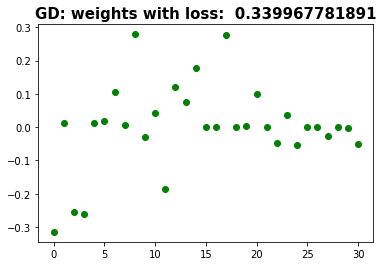

In [18]:
w, loss = func_GD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=500,gamma=0.1, initial_w=initial_w);


In [19]:
w.shape
tx_train.shape

(250000, 31)

In [20]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

74.495599999999996

## Ridge regression   

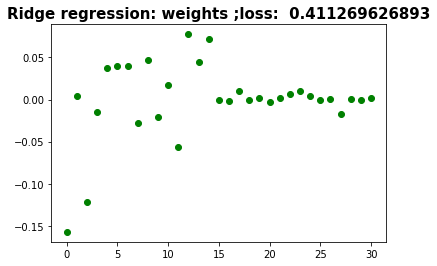

In [21]:
[w,loss]=func_ridge_regression (y=y_train, tx=tx_train, test_set=tx_test, lambda_=lambda_);

In [22]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

72.492800000000003

##  SGD

In [23]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

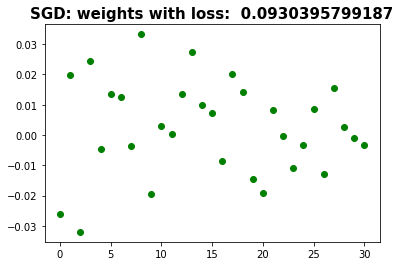

In [24]:
w, loss = func_SGD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,gamma=gamma, initial_w=initial_w,\
                   batch_size=5);

## LOGISTIC REGRESSION

In [25]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression(y,tx, k_fold, max_iters, gammas):
    
    accuracies=np.zeros(len(gammas))
    acc_max=0;
    gamma_best=0;
    
    for i, single_gamma in enumerate(gammas):
        
        seed=1;

        # get k'th subgroup in test, others in train
        k_indices = build_k_indices(y, k_fold, seed)
        accuracy_train = np.zeros(k_fold)
        accuracy_test = np.zeros(k_fold)


        for k in range(k_fold):
            #print('----- FOLD', k, '-----')
            k_index = k_indices[k]
            test_y = y[k_index]
            test_tx = tx[k_index,:]

            mask = np.ones(len(y), dtype=bool) # set all elements to True
            mask[k_index] = False              # set test elements to False
            train_tx = tx[mask,:]              # select only True elements (ie train elements)
            train_y = y[mask]
            weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx)
            predictions=True;
            accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
        accuracies[i]=np.mean(accuracy_test);
        
        print('GAMMA:', single_gamma, '---','ACCURANCY:',accuracies[i])
        if (accuracies[i]>acc_max):
                gamma_best=gammas[i];
                acc_max=accuracies[i];
    
    return gamma_best,acc_max
               
        # Compute accuracy of the predictions

        

In [26]:
gammas=np.linspace(0.00001,0.9,10);
k_fold=2;
max_iters=10;

best_gamma,acc_max=cross_validation_logistic_regression(y_train,tx_train, k_fold, max_iters, gammas)
print('BEST GAMMA:', best_gamma, '---','ACCURANCY:',acc_max)

GAMMA: 1e-05 --- ACCURANCY: 0.711072
GAMMA: 0.100008888889 --- ACCURANCY: 0.713916
GAMMA: 0.200007777778 --- ACCURANCY: 0.713916
GAMMA: 0.300006666667 --- ACCURANCY: 0.713916
GAMMA: 0.400005555556 --- ACCURANCY: 0.713916
GAMMA: 0.500004444444 --- ACCURANCY: 0.713916
GAMMA: 0.600003333333 --- ACCURANCY: 0.713916
GAMMA: 0.700002222222 --- ACCURANCY: 0.713916
GAMMA: 0.800001111111 --- ACCURANCY: 0.713916
GAMMA: 0.9 --- ACCURANCY: 0.713916
BEST GAMMA: 0.100008888889 --- ACCURANCY: 0.713916


In [27]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)  
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

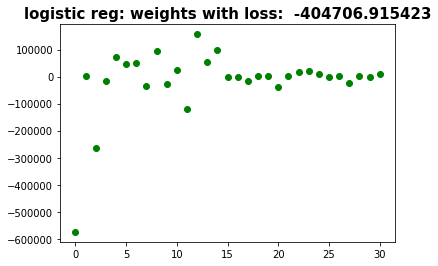

In [28]:
w, loss = func_logistic (y=y_train, tx=tx_train, test_set=tx_test, max_iters=50,\
                         gamma=best_gamma, initial_w=initial_w);

In [29]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

71.365200000000002

## LOGISTIC REGULARIZED

In [30]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression_reg(y,tx, k_fold, max_iters, gammas,lambdas):
    
    acc_max=0;
    accurancies=np.zeros([len(gammas),len(lambdas)]);
    for i, single_gamma in enumerate(gammas):
        for j, single_lambda in enumerate(lambdas):
            seed=1;
        
            # get k'th subgroup in test, others in train
            k_indices = build_k_indices(y, k_fold, seed)
            accuracy_train = np.zeros(k_fold)
            accuracy_test = np.zeros(k_fold)


            for k in range(k_fold):
                #print('----- FOLD', k, '-----')
                k_index = k_indices[k]
                test_y = y[k_index]
                test_tx = tx[k_index,:]

                mask = np.ones(len(y), dtype=bool) # set all elements to True
                mask[k_index] = False              # set test elements to False
                train_tx = tx[mask,:]              # select only True elements (ie train elements)
                train_y = y[mask]
                weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
                # Compute the predictions
                y_pred_train = predict_labels(weights, train_tx)
                y_pred_test = predict_labels(weights, test_tx)
                predictions=True;
                accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
                accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
            accurancies[i,j]= np.mean(accuracy_test);
            print('GAMMA', single_gamma, '---','LAMBDA', single_lambda, '---ACCURANCY:',accurancies[i,j])
            
            if (accurancies[i,j]>acc_max):
                gamma_best=gammas[i];
                lambda_best=lambdas[j];
                acc_max=accurancies[i,j];
            
            
    return [gamma_best,lambda_best,acc_max]
     
    
    
            # Compute accuracy of the predictions

            

In [31]:
#test cross_validation

gammas=np.linspace(0.000001,0.0001,2);
lambdas=np.linspace(0.001,0.3,2);
k_fold=2;
max_iters=10;
[gamma_best,lambda_best,acc_max]= cross_validation_logistic_regression_reg(y_train,tx_train, k_fold, max_iters, gammas,lambdas)

print('BEST GAMMA', gamma_best, '---','BEST LAMBDA', lambda_best, '---ACCURANCY:',acc_max)

GAMMA 1e-06 --- LAMBDA 0.001 ---ACCURANCY: 0.7034
GAMMA 1e-06 --- LAMBDA 0.3 ---ACCURANCY: 0.7034
GAMMA 0.0001 --- LAMBDA 0.001 ---ACCURANCY: 0.713864
GAMMA 0.0001 --- LAMBDA 0.3 ---ACCURANCY: 0.713864
BEST GAMMA 0.0001 --- BEST LAMBDA 0.001 ---ACCURANCY: 0.713864


In [35]:
def func_logistic_reg (y, tx, lambda_, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression regularized'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with the normalized log-like:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

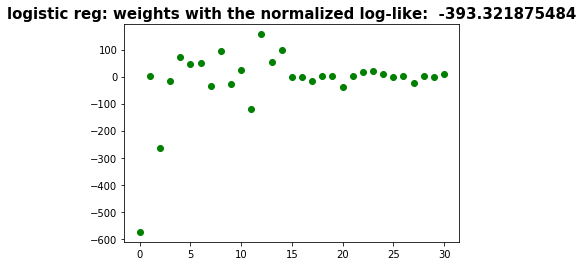

In [38]:
w, loss = func_logistic_reg (y=y_train, tx=tx_train, lambda_=lambda_best, test_set=tx_test, max_iters=50,\
                         gamma=gamma_best, initial_w=initial_w);



In [34]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

71.364399999999989